<a href="https://colab.research.google.com/github/exterm/uvm-mocs/blob/main/mocs_assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize Filesystem

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# create directory for this assignment
try: 
    os.mkdir('/content/drive/MyDrive/mocs/')
except OSError as error: 
    print(error)

try: 
    os.mkdir('/content/drive/MyDrive/mocs/01/')
except OSError as error: 
    print(error)

Mounted at /content/drive
[Errno 17] File exists: '/content/drive/MyDrive/mocs/'
[Errno 17] File exists: '/content/drive/MyDrive/mocs/01/'


# Question 1
In class videos, we derived three cases for the equilibrium state of the Lotka-Volterra competition model with two species. Using a phase space diagram, draw the fourth and final possible outcome for this model. Your diagram should include labeled axes, the isoclines with their intercepts, as well as arrows demonstrating the directions of the populations and any equilibrium points circled.

Does this case have a stable equilibrium point? An unstable equilibrium point?

## Answer
### Lotka-Volterra Competition Between Two Species

$$ \begin{align*}
\dot{N}_1&=r_1N_1\left(\frac{K_1-N_1-\alpha_2N_2}{K_1}\right)\\
\dot{N}_2&=r_2N_2\left(\frac{K_2-N_2-\alpha_1N_1}{K_2}\right)\\
\end{align*}$$

Remember:
$$ \begin{align*}
&N_1^*=0, &&N_1^{**}=K_1-\alpha_2N_2^{**}\\
&N_2^*=0 ,&&N_2^{**}=K_2-\alpha_1N_1^{**}\\
\end{align*} $$

Resolve to fixed point:
$$ \begin{align*}
&N_1^{**} = \frac{K_1-\alpha_2K_2}{1-\alpha_1\alpha_2}, &&N_2^{**} = \frac{K_2-\alpha_1K_1}{1-\alpha_1\alpha_2} 
\end{align*} $$

Four cases:
- $K_2<K_1/\alpha_2$, $K_1>K_2/\alpha_1$
  - investigated in class
  - extinction of species 2, domination of species 1
- $K_2>K_1/\alpha_2$, $K_1<K_2/\alpha_1$
  - investigated in class
  - extinction of species 1, domination of species 2
- $K_2<K_1/\alpha_2$, $K_1<K_2/\alpha_1$
  - investigated in class
  - stable coexistence. Indeed, the "coexistence" equilibrium point is an attractor.
- $K_2>K_1/\alpha_2$, $K_1>K_2/\alpha_1$
  - to be investigated

Choose $K_1=K_2=100$, $\alpha_1=\alpha_2=2$, $r_1=r_2=1$.

In [ ]:
# useful for exploration: https://aeb019.hosted.uark.edu/pplane.html

def plot_line(start, end, color, **kwargs):
  x_values = [start[0], end[0]]
  y_values = [start[1], end[1]]
  if 'linestyle' not in kwargs:
    kwargs['linestyle'] = 'dotted'
  if 'lw' not in kwargs:
    kwargs['lw'] = 3

  plt.plot(x_values, y_values, color=color, **kwargs)

def plot_eq_points(points):
  plt.plot([point[0] for point in points],[point[1] for point in points], 'yo', markersize=12, fillstyle='none', markeredgewidth=4, label='Equilibrium points')

def plotka_volterra(K1, K2, alpha1, alpha2, r1, r2):
  extent_x = max(K1, K2/alpha1)*1.2
  extent_y = max(K2, K1/alpha2)*1.2
  n1values, n2values = np.meshgrid(np.arange(0, extent_x, 1), np.arange(0, extent_y, 1))

  # differential equations
  n1dot = r1*n1values*(K1-n1values-alpha2*n2values)/K1
  n2dot = r2*n2values*(K2-n2values-alpha1*n1values)/K2

  plt.figure(figsize=(8, 8))

  plt.streamplot(n1values, n2values, n1dot, n2dot)

  # nullclines
  plt.axhline(y = 0,  color = 'k', linestyle='dotted', lw=3, label='First set of nullclines')
  plt.axvline(x = 0,  color = 'r', linestyle='dotted', lw=3, label='Second set of nullclines')

  plot_line([0, K2], [K2/alpha1, 0], 'k')
  plot_line([0, K1/alpha2], [K1, 0], 'r')

  plt.annotate('$K_2$', (0, K2), fontsize=12, xytext=(-4/100*extent_x,K2))
  plt.annotate('$\\frac{K_1}{\\alpha_2}$', (0, K1/alpha2), fontsize=15, xytext=(-4/100*extent_x,K1/alpha2))
  plt.annotate('$K_1$', (K1, 0), fontsize=12, xytext=(K1,-4/100*extent_y))
  plt.annotate('$K_2/\\alpha_1$', (K2/alpha1, 0), fontsize=12, xytext=(K2/alpha1,-4/100*extent_y))

  # equilibrium points
  n1ss = (K1-alpha2*K2)/(1-alpha1*alpha2)
  n2ss = (K2-alpha1*K1)/(1-alpha1*alpha2)

  equilibrium_points = [[0,0], [K1,0], [0,K2]]
  if (n1ss > 0) and (n2ss > 0):
    equilibrium_points = equilibrium_points + [[n1ss, n2ss]]

  plot_eq_points(equilibrium_points)

  # set up the plot
  plt.legend()
  plt.xlabel("$N_1$")
  plt.ylabel("$N_2$")
  plt.title(f'Lotka-Volterra Competition; $K_1={K1}$, $K_2={K2}$, $\\alpha_1={alpha1}$, $\\alpha_2={alpha2}$, $r_1={r1}$, $r_2={r2}$')

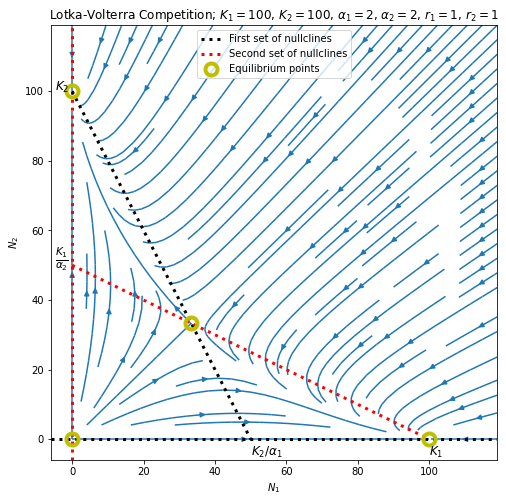

In [ ]:
plotka_volterra(100, 100, 2, 2, 1, 1)
plt.savefig('/content/drive/MyDrive/mocs/01/01-phase-space.png', dpi=600)
plt.show()

This is a saddle point equilibrium; trajectories run towards it in the bottom left and top right quadrant, but away from it in the bottom right and top left quadrant.

We can prove this via Jacobian eigenvalues.

# Question 2
You are on an environmental preservation team tasked with ensuring diversity in an environment containing two organisms in the same niche. In similar sites, it has been observed that organism 2 quickly dominates and reduces organism 1 to local extinction.
One of your colleagues has proposed that intermittently reducing the number of
organism 2 individuals, $N_2$, could prevent $N_1$, the number of organism 1 individuals, from crashing. However, your means of reducing $N_2$ is not very precise, and the disturbance will cause both $N_2$ and $N_1$ to decrease by a constant factor $\rho \in (0, 1)$ each time the reduction is applied. That is, at discrete intervals, both $N_1$ and $N_2$ will suddenly be reduced to values $\rho N_1$ and $\rho N_2$.

Do you think your colleague’s suggestion could help preserve healthy levels of both $N_1$ and $N_2$? Support your argument with a sketch using the phase space diagram from question 1. Is there a range of values which $\rho$ must take on for the intervention to be effective? Suppose you can apply the reduction whenever you like (it doesn’t necessarily have to be a fixed schedule).

## Answer

For species 1 to go extinct, we need an attractor with $N_1=0$, right on the y axis.

As we could see in (1), such an attractor exists in the saddlepoint scenario. It also exists in the "species 2 takes all" scenario:

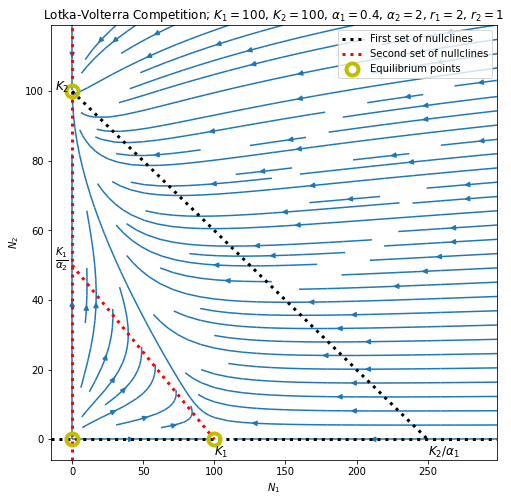

In [ ]:
plotka_volterra(100, 100, 0.4, 2, 2, 1)
plt.savefig('/content/drive/MyDrive/mocs/01/02-phase-space-winner-takes-all-species-2.png', dpi=600)
plt.show()

No attractor on the y axis if species 1 takes all:

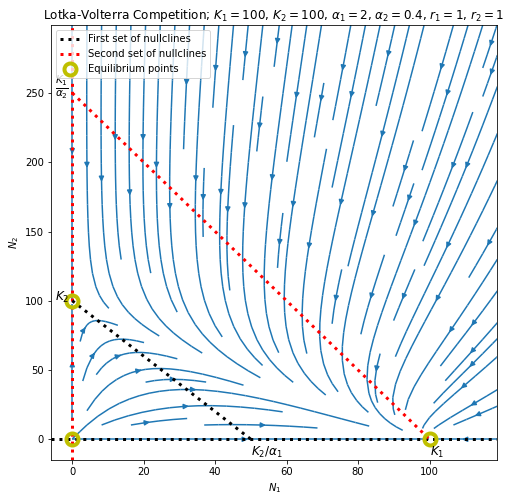

In [ ]:
plotka_volterra(100, 100, 2, 0.4, 1, 1)
plt.savefig('/content/drive/MyDrive/mocs/01/02-phase-space-winner-takes-all-species-1.png', dpi=600)
plt.show()

No attractor on the y axis in the coexistence scenario:

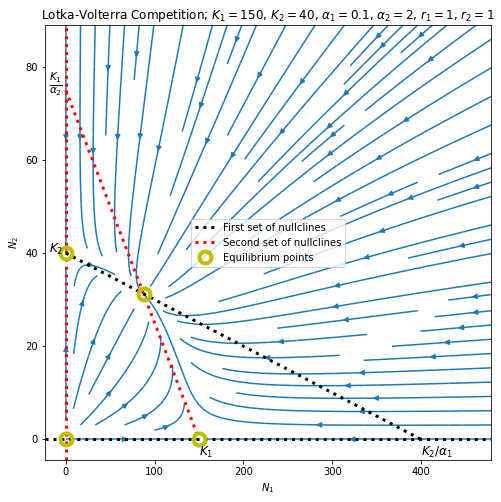

In [ ]:
plotka_volterra(150, 40, 0.1, 2, 1, 1)
plt.savefig('/content/drive/MyDrive/mocs/01/02-phase-space-coexistence.png', dpi=600)
plt.show()

Intervention in the "Species 2 wins" scenario.



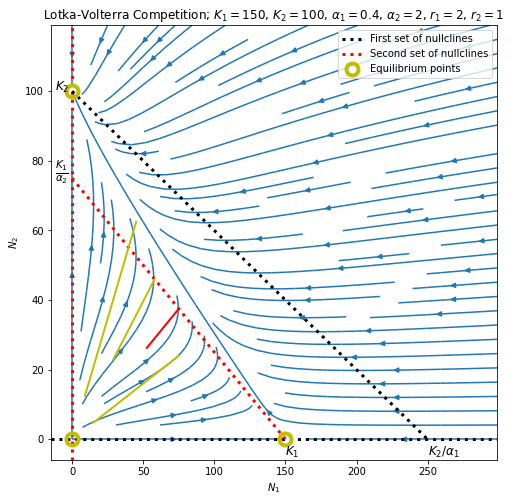

In [ ]:
K1 = 150
K2 = 100
alpha1 = 0.4
alpha2 = 2
r1 = 2
r2 = 1

plotka_volterra(K1, K2, alpha1, alpha2, r1, r2)

def second_nullcline(N1):
  return (K1-N1)/alpha2
  # return K2-alpha1*N1 # first nullcline

def intersection(N1):
  return np.array([N1, second_nullcline(N1)])

def intervention(p1, rho, color='y', **kwargs):
  p2 = np.array(p1) * rho
  plot_line(p1, p2, color, linestyle='-', lw=2, **kwargs)


intervention(intersection(58), 0.5)

intervention([75, 24], 0.2)

p1 = intersection(45)
intervention([p1[0], p1[1]+10], 0.2)

intervention(intersection(75), 0.7, color='r')

plt.savefig('/content/drive/MyDrive/mocs/01/02-intervention.png', dpi=600)
plt.show()

# Question 3
- Part1:Implement Eulers & Heuns Method with tunable parameter h (step size)
- Part2: What is the relationship between Eulers method and a discrete time model?

## Part1: Eulers Method

In [ ]:
#Part 1: Implement Eulers
import math
import matplotlib.pyplot as plt
from IPython import display
from time import sleep

In [ ]:
#Diff Eq: dy/dx = 2y
#initial conidtion: y(0) = 1
#Exact Solution : y= e^(2x)
#Eulers Method:  y = y+ Slope @beginning of interval*h
#used h instead of t to denote step size for problem below

#Functions
dy = lambda x,y: 2*y
f = lambda x: math.exp(2*x)

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

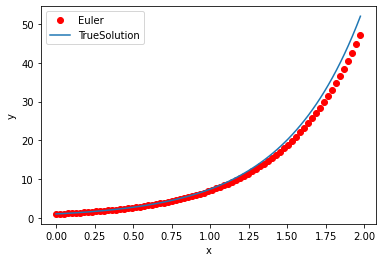

In [ ]:
#initialization
xi = 0; xf = 2
h = 0.026 #@param {type:"slider", min:0, max:0.99, step:0.001}
n = int((xf - xi)/h) #number of calculations perfroming, (interval / step size )), n defines number of times Eulers method below will loop.
x = 0; y=1 #initial condition 

#print('x \t\t y'); print('%f \t %f'% (x,y))
x_plot = []; y_euler = []; y_TrueSolution=[]

#Euler's Method
for i in range(1, n+1):
  x_plot.append(x); y_euler.append(y); y_TrueSolution.append(f(x))
  y = y + dy(x, y) * h
  x = x + h 
  #print('%f \t %f'% (x,y))
x_plot.append(x); y_euler.append(y); y_TrueSolution.append(f(x))

plt.plot(x_plot, y_euler,'ro', x_plot,y_TrueSolution) 
plt.legend(['Euler','TrueSolution'])
plt.xlabel('x'), plt.ylabel('y')

#Part 1: Heun's  Method (aka "Euler's Improved Method")

In [ ]:
import math
import matplotlib.pyplot as plt
from IPython import display
from time import sleep

In [ ]:
#Diff Eq: dy/dx = 2y
#initial conidtion: y(0) = 1
#Exact Solution : y= e^(2x)
#Eulers Method:  y = y+ Slope @beginning of interval*h
#used h instead of t to denote step size for problem below

#Functions
dy = lambda x,y: 2*y
f = lambda x: math.exp(2*x)

(Text(0.5, 0, 'x'), Text(0, 0.5, 'y'))

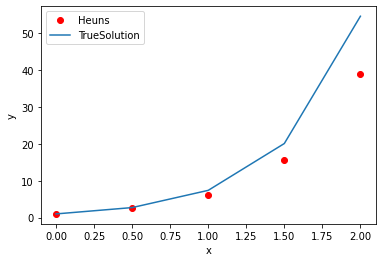

In [ ]:
#initialization
xi = 0; xf = 2
h = 0.50 #@param {type:"slider", min:0, max:0.99, step:0.001}
n = int((xf - xi)/h) #number of calculations perfroming, (interval / step size )), n defines number of times Eulers method below will loop.
x = 0; y=1 #initial condition 

#print('x \t\t y'); print('%f \t %f'% (x,y))
x_plot = []; y_heuns = []; y_TrueSolution=[]

#Heun's Method
for i in range(1, n+1):
  x_plot.append(x); y_heuns.append(y); y_TrueSolution.append(f(x))
  #Apply Euler Method to get Y at end of interval 
  dy1 = dy(x,y) ###get derivative at start of interval
  ye = y + dy1 * h
  #calc derivative at end point 
  dy2 = dy(x+h,ye)
  #calc new y estimate
  y = y + (dy1 + dy2)/2 * h
  x = x + h
  #print('%f \t %f'% (x,y))  
  
x_plot.append(x); y_heuns.append(y); y_TrueSolution.append(f(x))

plt.plot(x_plot, y_heuns,'ro', x_plot,y_TrueSolution) 
plt.legend(['Heuns','TrueSolution'])
plt.xlabel('x'), plt.ylabel('y')

##Part2: What is the relationship between Eulers Method and Discrete Time model ? 
Done in overleaf

# Question 4
##Sharone Working on

In [ ]:
import math
import matplotlib.pyplot as plt

#initial conditions
I = 10 #initial infected
N = 100
S = N-I #susceptible, 90

#steps                    ### Run model for 50 steps at a time, means #steps = 50...
h = 0.01                  ###Step sizes are given, run for (0.01, .5, 2.2) ---> 
#xi = 0; xf = 50 * h       #time interval, ensures 50 steps no matter value of h)
steps = 50

#steps = int((xf - xi)/h)  #number of calculations perfroming, (interval / step size )), 
                          #..n defines number of times Eulers method below will loop nl = number of loops
x = 0                     #???? 


#rates
alpha = 0.25              #recovery , given 
beta = 0.1               #### infection: infection rate are given, run for (0.03 , 0.06, 0.1) --->


#Functions Eulers Method
#def idot(): 
  #S*beta*I -alpha*I ###rate of new infections 
Idot = lambda I,S: S*beta*I -alpha*I

###Notes
#Diff Eq:  Idot = S*beta*I -alpha*I ###rate of new infections
#Eulers Method:  y = y+ Slope @beginning of interval*h
#Eulers Method applied:  next_I = I + Idot*h

ValueError: ignored

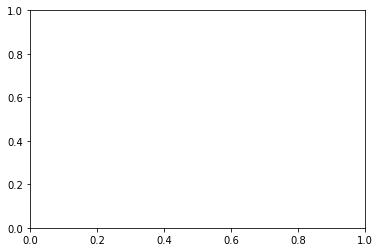

In [ ]:
#Eulers Method
x_plot = []; y_euler = [];

#for step in range(steps):

for step in range(1, steps+1):
  x_plot.append(x); y_euler.append(I)
  I = I + Idot(I,N-I)* h
  x = x + h
  
x_plot.append(x); y_euler.append(I)

# Heuns Method
#initalize???? 

x_plot = []; y_heuns = [];

for step in range(1, steps+1):
  x_plot.append(x); y_heuns.append(I)
   #Apply Euler Method to get Y at end of interval 
  Idot1 = Idot(I,N-I) ###get derivative at start of interval
  Ie = I + Idot1 * h
  #calc derivative at end point 
  Idot2 = Idot(x+h,Ie) 
  #calc new I estimate
  I = I + (Idot1 + Idot2)/2 * h
  x = x + h

x_plot.append(x); y_euler.append(I)

plt.plot(x_plot, y_heuns,'ro', x_plot,y_euler) 
plt.legend(['Heuns','Euler'])
plt.xlabel('x'), plt.ylabel('y')


# Question 6

Done in overleaf

# Question 7 work done by Philip - ignore this, Ardyn will do Q7
__Ardyn attempted her idea for Q7 (see below), but not sure we like it. Maybe it was not a very good model idea. Philip's idea and code look more interesting. Considering pursuing Philips idea...__ 

Floor heating!

Ingredients:
- continuous time
- continuous values
- no space
- two parts: $T_R$ Room temperature, $T_F$ Floor temperature
  - Floor temperature is auto-adjusted in relation to room temperature by a simple linear thermostat
  - Room temperature slowly adjusts to floor temperature
- Open system
- deterministic
- non-Markovian

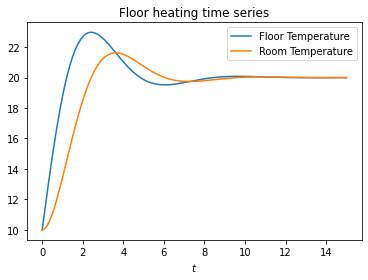

In [ ]:
# model params
tt = 20 # target temperature (thermostat setting)
t0 = 10  # initial temperature of both floor and room
alpha = 1
beta = 1

# simulation params
h = 0.1 # step size
n = 150 # number of steps

def tfdot(beta,tt,tr):
  return beta*(tt-tr)

def trdot(alpha,tf,tr):
  return alpha*(tf-tr)

def make_heating_dy_func(alpha, beta, tt):
  return lambda x, y: np.array([tfdot(beta, tt, y[1]), trdot(alpha, y[0], y[1])])

def simulate(alpha, beta, tt, t0, h, xi):
  y0 = [
    t0, # floor temp
    t0  # room temp
  ]
  dy = make_heating_dy_func(alpha, beta, tt)
  return heun(dy, y0, h, xi)

def heun(dy, y0, h, n):
  y = y0
  x = 0
  timeseries = [[x,y]]
  for step in range(0, n):
    dys = dy(x, y) # derivative at the start of the interval
    ye = y + dys*h # Euler's y
    dye = dy(x+h,ye) # derivative at the end of the interval
    y = y + (dys + dye)/2 * h
    x = x + h
    timeseries.append([x,y])
  return timeseries

def transpose(M):
    return [[M[j][i] for j in range(len(M))] for i in range(len(M[0]))]

timeseries = simulate(alpha, beta, tt, t0, h, n)

xs, yss = transpose(timeseries)

tfs, trs = transpose(yss)

plt.plot(xs, tfs, label='Floor Temperature')
plt.plot(xs, trs, label='Room Temperature')
plt.xlabel('$t$')
plt.legend()
plt.title("Floor heating time series")
# plt.savefig('/content/drive/MyDrive/mocs/01/07-timeseries.png', dpi=600)
plt.show()

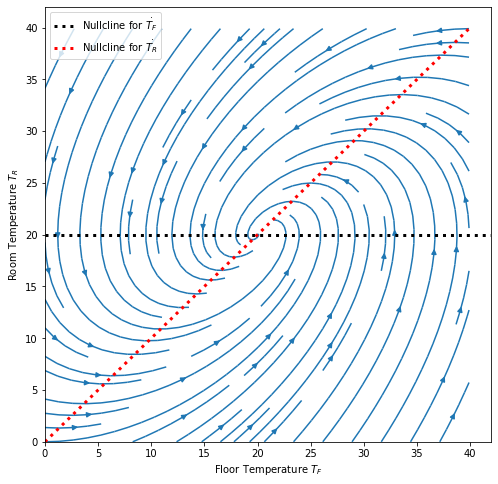

In [ ]:
def heating_phase_space_plot():
  extent_x = tt*2
  extent_y = tt*2
  n1values, n2values = np.meshgrid(np.arange(0, extent_x, 0.1), np.arange(0, extent_y, 0.1))

  # differential equations
  n1dot = tfdot(beta, tt, n2values)
  n2dot = trdot(alpha, n1values, n2values)

  plt.figure(figsize=(8, 8))


  plt.axhline(y = tt,  color = 'k', linestyle='dotted', lw=3, label='Nullcline for $\dot{T_F}$')

  # reusing this from q1 above
  plot_line([0, 0], [extent_x, extent_y], 'r', label='Nullcline for $\dot{T_R}$')

  plt.streamplot(n1values, n2values, n1dot, n2dot)
  plt.legend()
  plt.xlabel("Floor Temperature $T_F$")
  plt.ylabel("Room Temperature $T_R$")
  plt.show()

heating_phase_space_plot()

# Question 7

Using any system of your choice, come up with your own ODEs to model some phenomena in the system (for example, growth of a population, or spread of a rumor or contagion). The phenomena could be hypothetical, or based on real-world observations that you have studied or read about. Write down what the state variables of your model are, the parameters, and some interesting assumptions you made to simplify the model compared to the real world. Provide several figures of time-series plots with various combinations of parameters and initial conditions. Do you think your model can have cycles and/or stable/unstable equilibria? What do you think your model can tell you about its real-world counterpart?

Problem: There is a shortage of Army aviators. How might the throughput for flight school and the attrition rate effect the number of aviators in the future? What needs to change to ensure there are sufficient Army aviators and, in particular, senior aviators?

Part = Army pilot

System = entry-level aviator, junior aviator, and senior aviator
- Open system

Time = years

State variables:
-	E: number of entry level aviators
-	J: number of junior aviators
-	S: number of senior aviators
-	N: total populations, where N = E + J + S

Parameters:
-	t = time, measured in years

Inputs
-	N0 = initial number of total aviators (population size)
- E0 = initial number of entry level aviators
- J0 = initial number of junior level aviators
-	a = rate pilots complete flight school (1,272 pilots per year)
- NT = target number of total aviators
- ST = target number of senior aviators

Outputs
-	b = rate of attrition for new aviators = 5% per year
-	c = rate of becoming junior aviator (1/6 per year = fraction of population promoted)
-	d = rate of attrition for junior aviators = 10% per year
-	e = rate of becoming senior aviator (1/7 per year = fraction of population promoted)
-	f = rate of attrition for senior aviators = 10% per year

Assumptions
-	Rate that pilots complete flight school is dependent on the gap between target number of aviators and actual number of aviators
-- 1,272 pilots per year is the goal from Meyers 2019
-	Rate of attrition is constant (independent of population density)
--	10% per year reported from Hoffinger
-- Assumed lower attrition rate for entry level (5% per year). Entry level might have lowest because they have less desirable flight hours for commercial airlines and must repay army
-	Rate that pilots promote to junior aviator is constant (independent of aviator population)
--	Most pilots transition to junior level after 6 years, promotion rate per pilot is 1/6 years
-- Definition of junior aviator with 6-13 years of experience from The pilot shortage (Meyers 2019)
-	Rate that pilots promote to senior aviator is depends on the gap between target number of senior aviators and actual number of senior aviators
-- Currently, we assume that we will always have enough junior aviators (independent of junior aviator population)
o	Most pilots transition to senior level after 7 years, promotion rate per pilot is 1/7 years
-- Definition of senior aviator with 13+ years of service (Meyers 2019)

Meyers 2019: https://www.armytimes.com/news/your-army/2019/08/07/the-pilot-shortage-the-armys-struggle-to-fix-its-aviation-problems/

Hoffinger: https://juniorofficer.army.mil/army-aviation-alternatives-to-the-10-year-service-obligation/


In [ ]:
# Set up time parameters for model
h = 1.0 #timestep in years
n = 30.0 # number of years to evaluate

In [ ]:
def calculate_populations(E0,J0,S0,N0,ST,NT,h,n):
  #discrete steps of Euler's methods
  res = [] #list of results
  E = E0; J = J0; S = S0; N = N0 # set initial conditions
  #S = S0; I = I0; R = R0 #set initial conditions
  #h = 1.0; #timestep in years
  T = np.arange(1,n/h);
  for t in T:
    delta_E = a*(NT-N) - b*E - c*E # rate of new aviators
    E += delta_E*h #E(t+1)
    delta_J = c*E - d*J - e*(ST-S)
    J += delta_J*h #J(t+1)
    delta_S = e*(ST-S)*J - f*S # rate of senior aviators
    S += delta_S*h #S(t+1)
    N = E+J+S
    res.append((E, J, S))

  #zip unpacked list of tuples (n-th elements all together)
  #map them to arrays
  Et,Jt,St = map(np.array, zip(*res))

  #St,It,Rt = map(np.array, zip(*res))
  return T,Et,Jt,St

In [ ]:
def plot_time_series(h,T,Et,Jt,St):
  #plot results
  fig,ax = plt.subplots()
  ax.plot(h*T, Et, 'b', label='Entry')
  ax.plot(h*T, Jt, 'r', label='Junior')
  ax.plot(h*T, St, 'g', label='Senior')
  ax.plot(h*T,Et+Jt+St, 'k', label='Total')

  plt.xlabel('Years')
  plt.ylabel('Number of Aviators')
  #plt.title('Number of Army Aviators')
  ax.legend();

In [ ]:
def reset_conditions():

  N0 = 14000 # total number of Army aviators at time zero
  E0 = 7000 # number of entry levl pilots at time zero
  J0 = 5000 # number of junior level pilots at time zero
  S0 = N0 - E0 - J0 # number of senior level pilots at time zero

  NT = 20000 # target number of Army aviators 
  ST = NT/3 # target number of senior level pilots

  a = 1272/(NT-N0) # proportion of pilots that complete flight school to current pilot deficit: start at 1,272 pilots per year given current total pilot deficit of Nt-N0 = 1600 
  b = 5/100 # rate of attrition for new aviators: 5 pilots per 100 pilots per year
  c = 1/6 # rate of new aviators bcoming junior aviators: 6 years per pilot = 1 pilot per 6 years
  d = 10/100 # rate of attrition for junior aviators: 10 pilots per 100 pilots per year
  e = 1/7/(ST-S0) # rate of junior aviators becoming senior aviators: 7 years per pilot = 1 pilot per 7 years
  f = 10/100 # rate of attrition for senior aviators: 10 pilots per 100 pilots per year

  return N0, E0, J0, S0, NT, ST, a, b, c, d, e, f

In [ ]:
#Trial 1: "Reported" Conditions
title_str = 'Trial 1: "Reported" Conditions'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);


In [ ]:
#Trial 2: Under-reported attrition rate
title_str = 'Trial 2: Under-reported attrition rate'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()
b = 10/100 # rate of attrition for new aviators: 5 pilots per 100 pilots per year
d = 20/100 # rate of attrition for junior aviators: 10 pilots per 100 pilots per year
f = 20/100 # rate of attrition for senior aviators: 10 pilots per 100 pilots per year

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);


In [ ]:
#Trial 3: Flight School Delays (decreased input)
title_str = 'Trial 3: Flight School Delays (decreased input)'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()
a = 500/(NT-N0) # proportion of pilots that complete flight school to current pilot deficit: start at 1,272 pilots per year given current total pilot deficit of Nt-N0 = 1600 

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);

In [ ]:
#Trial 4: Flight School Expedited (increased input)
title_str = 'Trial 4: Flight School Expedited (increased input)'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);

In [ ]:
#Trial 5: Majority Senior Pilots
title_str = 'Trial 5: Majority Senior Pilots'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()
ST = NT/2 # target number of senior level pilots

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);

In [ ]:
#Trial 6: Ideal Conditions (attrition only at senior level)
title_str = 'Trial 6: Ideal Conditions (attrition only at senior level)'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()
b = 0 # rate of attrition for new aviators: 5 pilots per 100 pilots per year
d = 0 # rate of attrition for junior aviators: 10 pilots per 100 pilots per year
f = 10/100 # rate of attrition for senior aviators: 10 pilots per 100 pilots per year

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);

In [ ]:
#Trial 7: Depleted junior and senior level aviator populations
title_str = 'Trial 7: Depleted Junior and Senior Level Aviator Populations'

# define parameters
N0, E0, J0, S0, NT, ST, a, b, c, d, e, f = reset_conditions()
E0 = 10000 # number of entry levl pilots at time zero
J0 = 2000 # number of junior level pilots at time zero
S0 = N0 - E0 - J0 # number of senior level pilots at time zero

# calculate number of aviators in each group
T, Et, Jt, St = calculate_populations(E0,J0,S0,N0,ST,NT,h,n)

plot_time_series(h,T,Et,Jt,St)
plt.title(title_str);

__Do you think your model can have cycles and/or stable/unstable equilibria?__

__What do you think your model can tell you about its real-world counterpart?__
